In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bank_df = pd.read_csv('bank.csv')
#bank_df = pd.read_csv('bank_formatted.csv')
bank_df.head(3)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."


In [4]:
import pandas as pd
bank_df = pd.read_csv('bank.csv', sep=';', lineterminator='\n')
#bank_df.to_csv('bank_test_formatted.csv')

In [5]:
unknown_count=(bank_df['job']=='unknown').sum() 
unknown_count

38

In [6]:
for column in bank_df:
    unknown_count = 0
    unknown_count=(bank_df[column]=='unknown').sum() 
    print(f'{column} {unknown_count}')

age 0
job 38
marital 0
education 187
default 0
balance 0
housing 0
loan 0
contact 1324
day 0
month 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 3705
y 0


In [7]:
bank_df = bank_df[bank_df['job'] != 'unknown']

In [8]:
bank_df.to_csv('bank_df_test_filtered.csv')

In [9]:
bank_df_filtered = pd.read_csv('bank_df_test_filtered.csv')

In [10]:
bank_df_filtered.columns
bank_df_filtered.head(4)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [11]:
count_nodefault= bank_df_filtered[bank_df_filtered['default'] == 'no']
count_nodefault.shape

(4407, 18)

In [12]:
bank_df_filtered.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,4483.000000,4483.000000,4483.000000,4483.000000,4483.000000,4483.000000,4483.000000,4483.000000
mean,2258.730315,41.111309,1421.987731,15.915905,264.360027,2.795673,39.796565,0.542940
std,1305.367088,10.559382,3017.124448,8.235155,260.273544,3.116897,99.910253,1.696552
min,0.000000,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,1126.500000,33.000000,67.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2258.000000,39.000000,443.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3388.500000,48.000000,1474.000000,21.000000,329.500000,3.000000,-1.000000,0.000000
max,4520.000000,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Visualization

Text(0.5, 0, 'age')

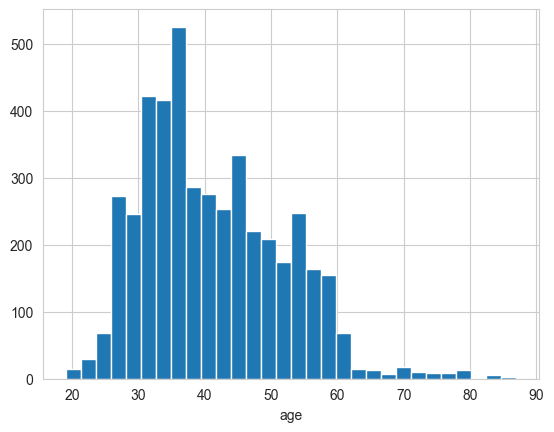

In [13]:
sns.set_style('whitegrid')
bank_df_filtered['age'].hist(bins=30)
plt.xlabel('age')

Text(0.5, 0, 'y')

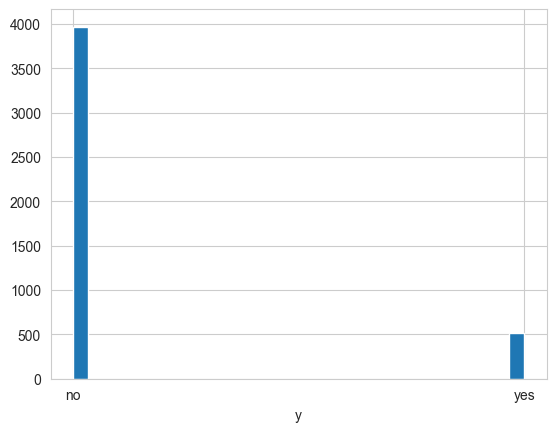

In [14]:
sns.set_style('whitegrid')
bank_df_filtered['y'].hist(bins=30)
plt.xlabel('y')

Text(0.5, 0, 'loan')

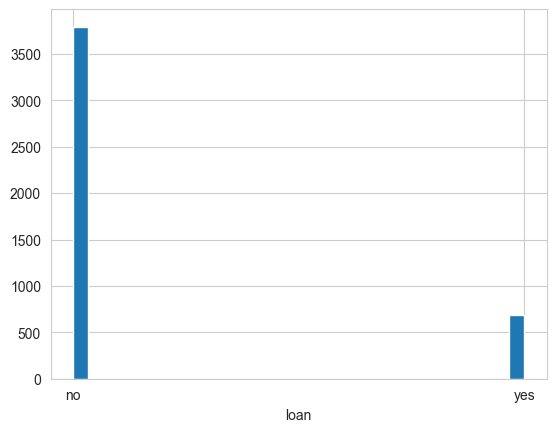

In [15]:
sns.set_style('whitegrid')
bank_df_filtered['loan'].hist(bins=30)
plt.xlabel('loan')

Text(0.5, 0, 'default')

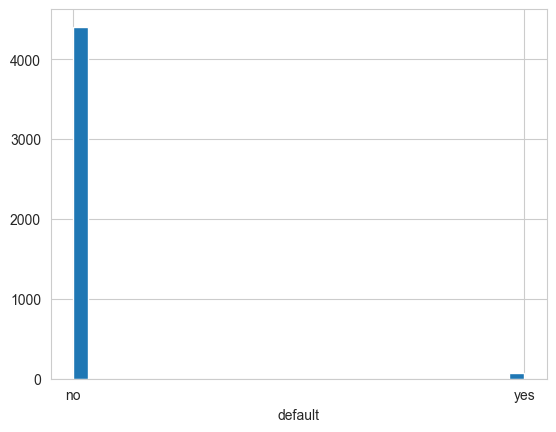

In [16]:
sns.set_style('whitegrid')
bank_df_filtered['default'].hist(bins=30)
plt.xlabel('default')

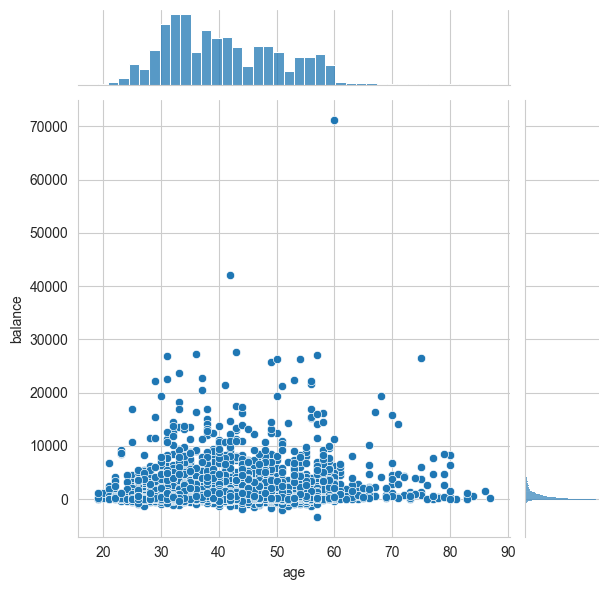

In [12]:
sns.jointplot(x='age',y='balance',data=bank_df_filtered)

In [ ]:
#sns.jointplot(x='age',y='duration',data=bank_df_filtered,color='red',kind='kde')
#sns.pairplot(bank_df_filtered,hue='y',palette='bwr')

#### Logistic Regression

In [16]:
bank_df_filtered['default'] = bank_df_filtered['default'].map({'yes': 1, 'no': 0})
bank_df_filtered['housing'] = bank_df_filtered['housing'].map({'yes': 1, 'no': 0})
bank_df_filtered['loan'] = bank_df_filtered['loan'].map({'yes': 1, 'no': 0})
bank_df_filtered['y'] = bank_df_filtered['y'].map({'unknown':9,'yes': 1, 'no': 0})  
bank_df_filtered['marital'] = bank_df_filtered['marital'].map({'single':1,'married': 1, 'divorced': 2})  
bank_df_filtered['job'] = bank_df_filtered['job'].map({'management':1,'technician': 2, 'entrepreneur': 3,'blue-collar':3,'retired':4,'admin.':5,'services':6,'self-employed':7,'unemployed':8,'housemaid':9,'student':10 })  
bank_df_filtered['education'] = bank_df_filtered['education'].map({'tertiary':1,'secondary': 2, 'primary': 3,'unknown':9})  
bank_df_filtered['contact'] = bank_df_filtered['contact'].map({'cellular':1,'telephone': 2, 'unknown': 9})  
bank_df_filtered['poutcome'] = bank_df_filtered['poutcome'].map({'failure':1,'success': 2,'other':3, 'unknown': 9})  
bank_df_filtered['month'] = bank_df_filtered['month'].map({'jan':1,'feb': 2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'oct':10,'nov':11,'dec':12})  

In [17]:
def age_categories():
    age_thresholds=bank_df_filtered['age']
    for age in age_thresholds:
        if age>0 and age <40:
            bank_df_filtered['age_category'] = 1
        elif age>40 and age <60:
            bank_df_filtered['age_category'] = 2
        elif age>60:
            bank_df_filtered['age_category'] = 3
age_categories()

In [18]:
bank_df_filtered.head(1)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_category
0,0,30,8,1,3,0,1787,0,0,1,19,10.0,79,1,-1,0,9,0,2


In [19]:
bank_df_filtered['month'].unique()

array([10.,  5.,  4.,  6.,  2.,  8.,  1.,  7., 11., nan,  3., 12.])

In [20]:
bank_df_filtered.isna().sum()

Unnamed: 0       0
age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month           50
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
y                0
age_category     0
dtype: int64

In [81]:
bank_df_filtered.to_csv('test_data.csv')

In [53]:
from sklearn.model_selection import train_test_split
X = bank_df_filtered[['age', 'job', 'marital', 'education', 'default','balance', 'housing', 'loan', 'contact', 'day', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'y', 'age_category']]
y = bank_df_filtered['y']
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'age_category'],
      dtype='object')


#### Logsitic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
#logmodel.fit(X,y)
predictions_test = logmodel.predict(X_test)

#print(predictions)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predictions for yes :  90
Predictions for no :  1390


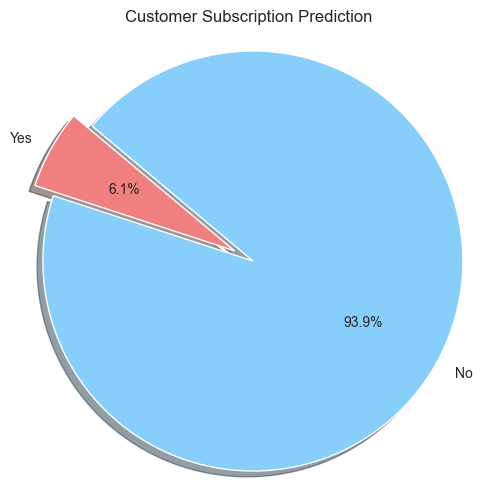

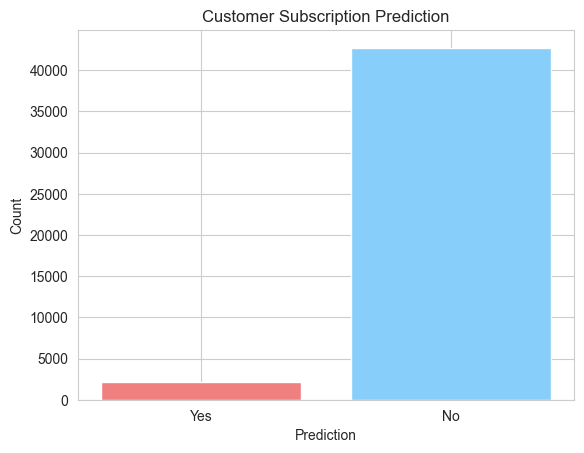

In [55]:
num_yes = sum(predictions_test)  # Counting the number of 'yes' predictions
num_no = len(predictions_test) - num_yes  # Counting the number of 'no' predictions
print('Predictions for yes : ',num_yes)
print('Predictions for no : ',num_no)

labels = ['Yes', 'No']
sizes = [num_yes, num_no]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # To explode the 'Yes' slice

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customer Subscription Prediction")
plt.show()
# Using Bar Chart:

# python
# Copy code
import matplotlib.pyplot as plt

# Assuming you have made predictions and stored them in the variable 'predictions'
num_yes = sum(predictions)  # Counting the number of 'yes' predictions
num_no = len(predictions) - num_yes  # Counting the number of 'no' predictions

# Data for the bar chart
labels = ['Yes', 'No']
counts = [num_yes, num_no]

# Creating the bar chart
plt.bar(labels, counts, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Customer Subscription Prediction')
plt.show()

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

# Calculate class weights to handle data imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y)

# Create and train the Logistic Regression model with class weighting
logmodel = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})
logmodel.fit(X_train, y_train)
prediction_lr = logmodel.predict(X_test)
# # Create and train the Random Forest model with class weighting
# rf_model = RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1]})
# rf_model.fit(X_train, y_train)


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
# num_yes = sum(predictions_test)  # Counting the number of 'yes' predictions
# num_no = len(predictions_test) - num_yes  # Counting the number of 'no' predictions
# print('Predictions for yes : ',num_yes)
# print('Predictions for no : ',num_no)

# labels = ['Yes', 'No']
# sizes = [num_yes, num_no]
# colors = ['lightcoral', 'lightskyblue']
# explode = (0.1, 0)  # To explode the 'Yes' slice

# # Creating the pie chart
# plt.figure(figsize=(6, 6))
# plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title("Customer Subscription Prediction")
# plt.show()
# # Using Bar Chart:

# # python
# # Copy code
# import matplotlib.pyplot as plt

# # Assuming you have made predictions and stored them in the variable 'predictions'
# num_yes = sum(predictions)  # Counting the number of 'yes' predictions
# num_no = len(predictions) - num_yes  # Counting the number of 'no' predictions

# # Data for the bar chart
# labels = ['Yes', 'No']
# counts = [num_yes, num_no]

# # Creating the bar chart
# plt.bar(labels, counts, color=['lightcoral', 'lightskyblue'])
# plt.xlabel('Prediction')
# plt.ylabel('Count')
# plt.title('Customer Subscription Prediction')
# plt.show()

In [73]:
final_dataset = pd.read_csv('final_dataset.csv')
X = final_dataset[['age', 'job', 'marital', 'education', 'default','balance', 'housing', 'loan', 'contact', 'day', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'y', 'age_category']]
y = final_dataset['y']
predictions_lr = logmodel.predict(X)

Predictions for yes :  3409
Predictions for no :  41514


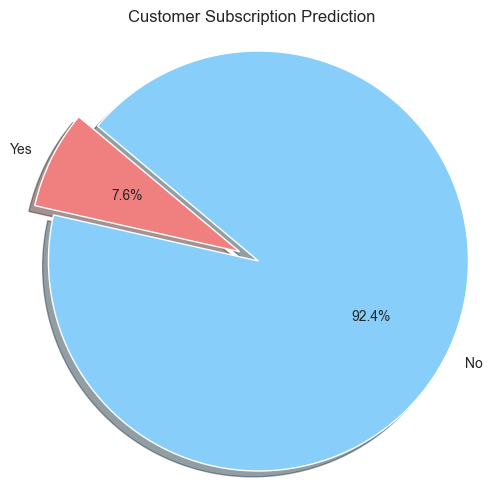

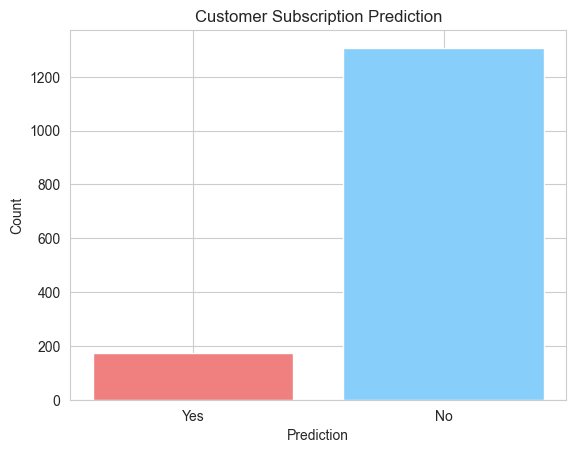

In [74]:
num_yes = sum(predictions_lr)  # Counting the number of 'yes' predictions
num_no = len(predictions_lr) - num_yes  # Counting the number of 'no' predictions
print('Predictions for yes : ',num_yes)
print('Predictions for no : ',num_no)

labels = ['Yes', 'No']
sizes = [num_yes, num_no]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # To explode the 'Yes' slice

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customer Subscription Prediction")
plt.show()
# Using Bar Chart:

# python
# Copy code
import matplotlib.pyplot as plt

# Assuming you have made predictions and stored them in the variable 'predictions'
num_yes = sum(predictions)  # Counting the number of 'yes' predictions
num_no = len(predictions) - num_yes  # Counting the number of 'no' predictions

# Data for the bar chart
labels = ['Yes', 'No']
counts = [num_yes, num_no]

# Creating the bar chart
plt.bar(labels, counts, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Customer Subscription Prediction')
plt.show()

In [75]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y,predictions_lr))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     39668
           1       0.76      0.50      0.60      5255

    accuracy                           0.92     44923
   macro avg       0.85      0.74      0.78     44923
weighted avg       0.92      0.92      0.92     44923



#### Decision Tree and Random Forest

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [61]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions_dt_test = dtree.predict(X_test)
#print(classification_report(y_test,predictions))
print(predictions_dt_test)

[0 0 0 ... 0 0 0]


Predictions for yes :  172
Predictions for no :  1308


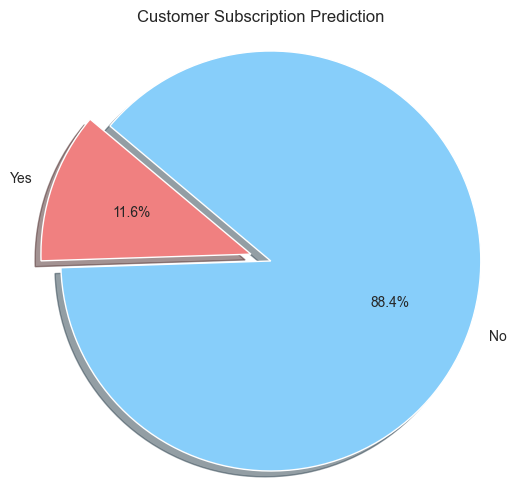

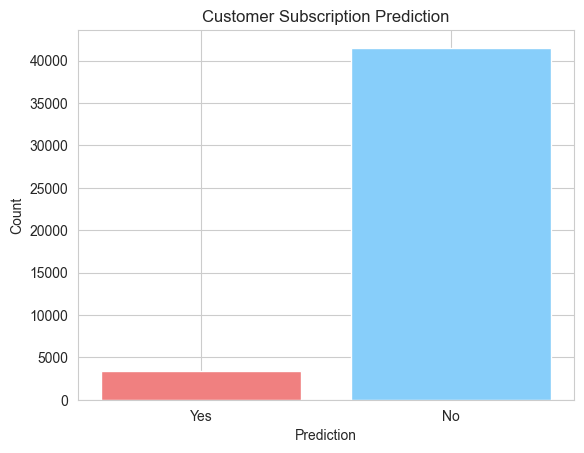

In [62]:
num_yes = sum(predictions_dt_test)  # Counting the number of 'yes' predictions
num_no = len(predictions_dt_test) - num_yes  # Counting the number of 'no' predictions
print('Predictions for yes : ',num_yes)
print('Predictions for no : ',num_no)

labels = ['Yes', 'No']
sizes = [num_yes, num_no]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # To explode the 'Yes' slice

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customer Subscription Prediction")
plt.show()
# Using Bar Chart:

# python
# Copy code
import matplotlib.pyplot as plt

# Assuming you have made predictions and stored them in the variable 'predictions'
num_yes = sum(predictions)  # Counting the number of 'yes' predictions
num_no = len(predictions) - num_yes  # Counting the number of 'no' predictions

# Data for the bar chart
labels = ['Yes', 'No']
counts = [num_yes, num_no]

# Creating the bar chart
plt.bar(labels, counts, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Customer Subscription Prediction')
plt.show()

In [63]:
predictions_dt = dtree.predict(X)
#print(classification_report(y_test,predictions))
print(predictions_dt)

[0 0 0 ... 1 0 0]


Predictions for yes :  5255
Predictions for no :  39668


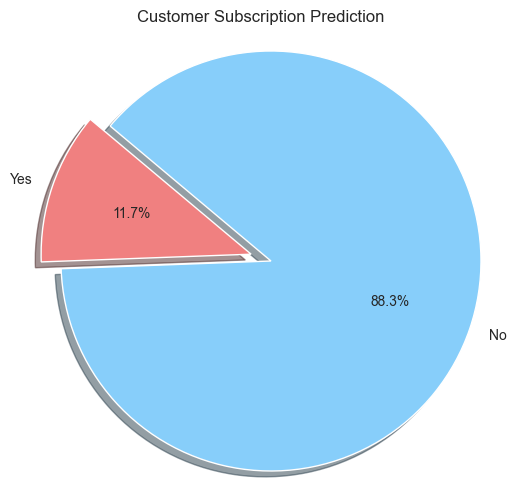

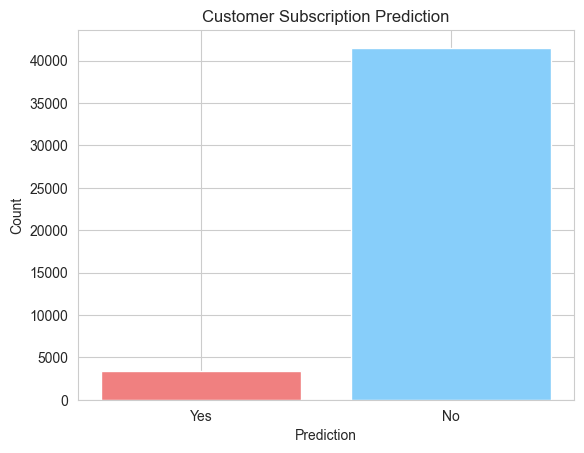

In [64]:
num_yes = sum(predictions_dt)  # Counting the number of 'yes' predictions
num_no = len(predictions_dt) - num_yes  # Counting the number of 'no' predictions
print('Predictions for yes : ',num_yes)
print('Predictions for no : ',num_no)

labels = ['Yes', 'No']
sizes = [num_yes, num_no]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # To explode the 'Yes' slice

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customer Subscription Prediction")
plt.show()
# Using Bar Chart:

# python
# Copy code
import matplotlib.pyplot as plt

# Assuming you have made predictions and stored them in the variable 'predictions'
num_yes = sum(predictions)  # Counting the number of 'yes' predictions
num_no = len(predictions) - num_yes  # Counting the number of 'no' predictions

# Data for the bar chart
labels = ['Yes', 'No']
counts = [num_yes, num_no]

# Creating the bar chart
plt.bar(labels, counts, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Customer Subscription Prediction')
plt.show()

In [69]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y,predictions_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39668
           1       1.00      1.00      1.00      5255

    accuracy                           1.00     44923
   macro avg       1.00      1.00      1.00     44923
weighted avg       1.00      1.00      1.00     44923



#### Random Forest

Predictions for yes :  172
Predictions for no :  1308


Text(0.5, 1.0, 'Customer Subscription Prediction')

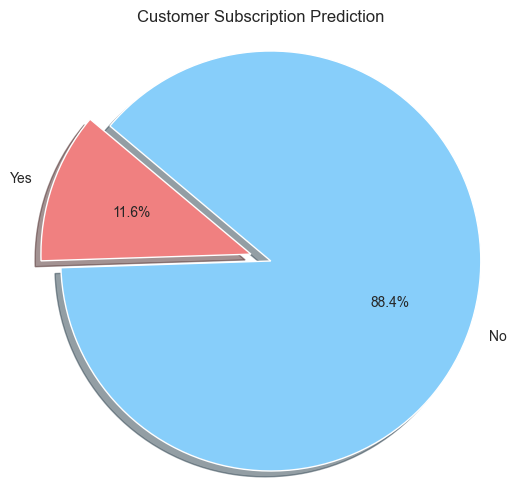

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
num_yes = sum(predictions)  # Counting the number of 'yes' predictions
num_no = len(predictions) - num_yes  # Counting the number of 'no' predictions
print('Predictions for yes : ',num_yes)
print('Predictions for no : ',num_no)

labels = ['Yes', 'No']
sizes = [num_yes, num_no]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # To explode the 'Yes' slice

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customer Subscription Prediction")

Predictions for yes :  5255
Predictions for no :  39668


Text(0.5, 1.0, 'Customer Subscription Prediction')

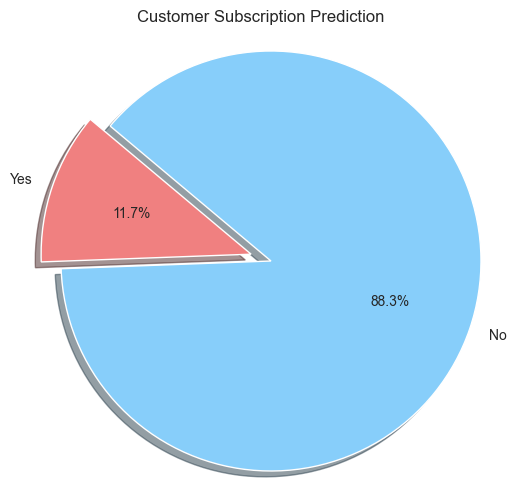

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X,y)
predictions_rfc = rfc.predict(X)
num_yes = sum(predictions_rfc)  # Counting the number of 'yes' predictions
num_no = len(predictions_rfc) - num_yes  # Counting the number of 'no' predictions
print('Predictions for yes : ',num_yes)
print('Predictions for no : ',num_no)

labels = ['Yes', 'No']
sizes = [num_yes, num_no]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # To explode the 'Yes' slice

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customer Subscription Prediction")

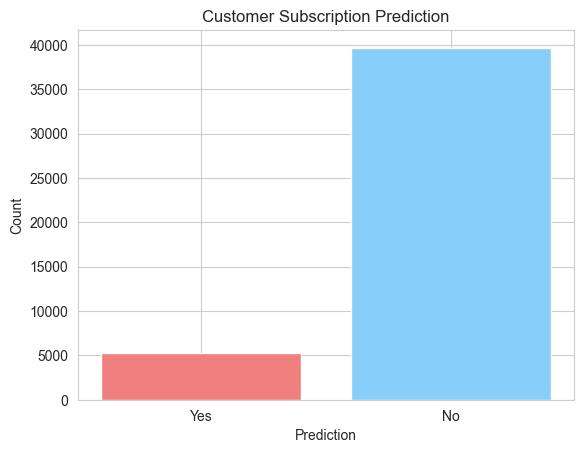

In [67]:
# Data for the bar chart
labels = ['Yes', 'No']
counts = [num_yes, num_no]

# Creating the bar chart
plt.bar(labels, counts, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Customer Subscription Prediction')
plt.show()

In [68]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y,predictions_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39668
           1       1.00      1.00      1.00      5255

    accuracy                           1.00     44923
   macro avg       1.00      1.00      1.00     44923
weighted avg       1.00      1.00      1.00     44923

